In [51]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
import pylatexenc
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [52]:
circuit = QuantumCircuit(3, 2) # Creates 3 qubits and 2 classical bits.
#One qubit is the state to be teleported.

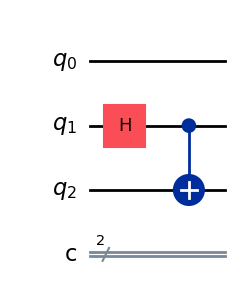

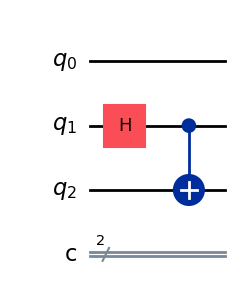

In [53]:
# ALL THREE QUBITS ARE IN STATE |0>
circuit.h(1)        # Hadamard on Alice’s half of the entangled pair; transforms qubit q1 into superposition of basis states |0> and |1>
circuit.cx(1, 2)    # CNOT: control = q1, target = q2; entangles the qubits.
circuit.draw('mpl')
# NOW, QUBIT 0 IS IN STATE |0>, QUBIT 1 & 2 ARE ENTANGLED: IF YOU MEASURE ONE, IT COLLAPSES TO EITHER |0> or |1>, AS DOES THE OTHER QUBIT

In [54]:
# Change q0 to some random state by rotating using theta and phi; this is what information we are teleporting!
theta = 0.7
phi = 0.1
circuit.ry(theta, 0)
circuit.rz(phi, 0)
# psi = Statevector.from_instruction(circuit)
# plot_bloch_multivector(psi)

In [55]:
circuit.measure([0, 1], [0, 1])

In [56]:
# Apply conditional gates to qubit 2 based on measurements of qubits 0 and 1
circuit.cx(1, 2) # If classical bit 1 is 1, apply X gate to qubit 2
circuit.cz(0, 2) # If classical bit 0 is 1, apply Z gate to qubit 2

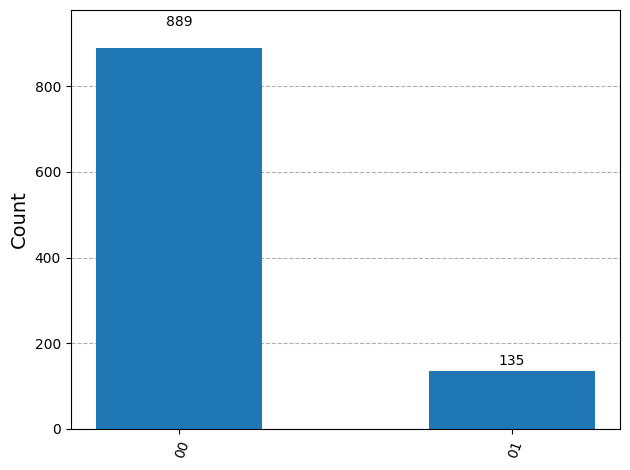

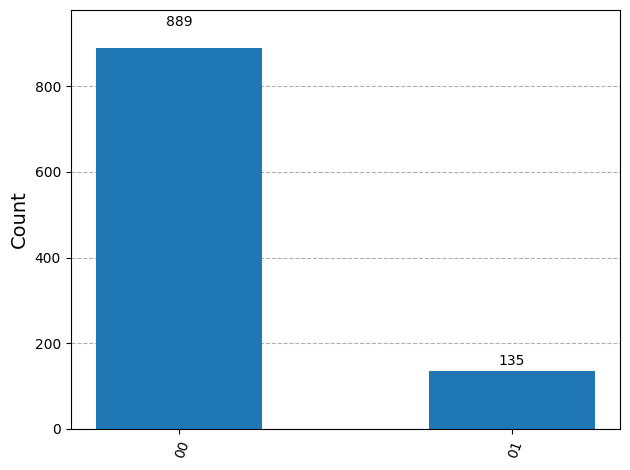

In [57]:
# Measure the teleported state on qubit 2
circuit.measure(2, 1)

# Use the simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()

# Get the counts of the measurement outcomes
counts = result.get_counts(circuit)
plot_histogram(counts)